# 천체물리학 중간고사 대체 과제

In [2]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

#데이터 불러오기
df = pd.read_csv('./exoplanet.eu_catalog.csv')
df.head()

/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_65177/2518063231.py:7: DtypeWarning: Columns (95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./exoplanet.eu_catalog.csv')


,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0000,3.00000,3.00000,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 Uma b,Candidate,3.7200,0.82000,0.82000,NaN,NaN,NaN,NaN,NaN,...,K5III,NaN,NaN,NaN,4090.0,70.0,70.0,NaN,NaN,NaN
3,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN


## A. 위 목록을 csv파일로 다운받아 두가지 다이어 그램을 작성하여 제출
(행성 발견 방법 별로 구분하여)
### 1. Star mass vs Planet mass
(star_mass, mass)

<>:26: SyntaxWarning: invalid escape sequence '\o'
<>:26: SyntaxWarning: invalid escape sequence '\o'
/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_65177/420351755.py:26: SyntaxWarning: invalid escape sequence '\o'
  plot.xlabel('Star Mass(M$_\odot$)',fontsize = 20)


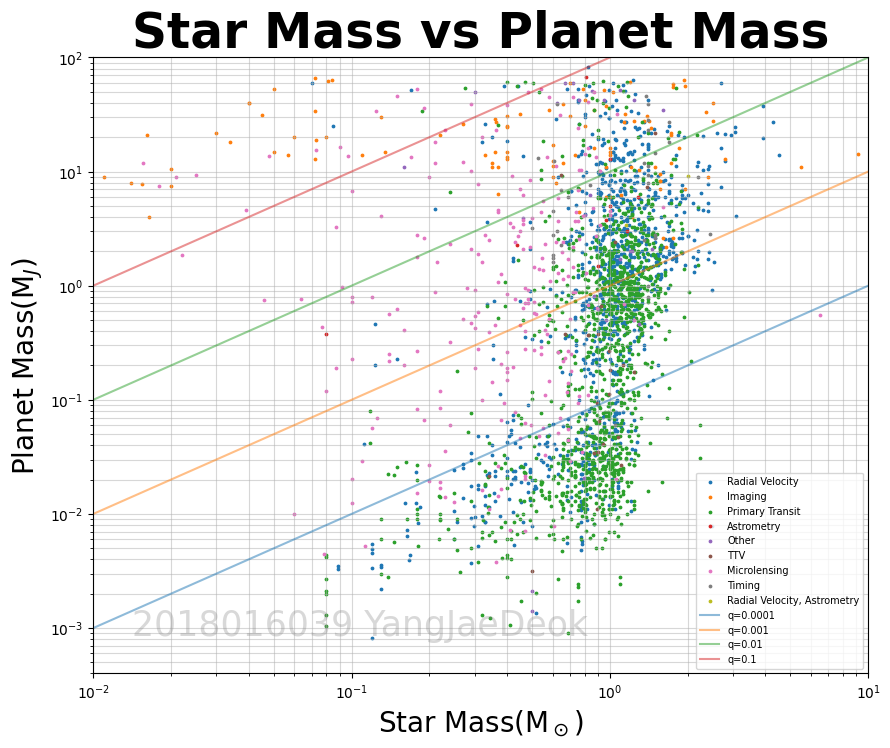

In [11]:
# 확인된 행성 데이터 프레임
df_confirmed = df[(df['planet_status']=='Confirmed')]

# 발견 방법 목록
detection_type = df_confirmed['detection_type'].unique()

plot.figure(1, figsize=(10,8))
plot.title('Star Mass vs Planet Mass',fontsize = 35 ,fontweight='bold')

# 발견 방법 별 산점도 플롯
for index,type_name in enumerate(detection_type):
    plot.scatter(df_confirmed['star_mass'][df_confirmed['detection_type']==type_name],
                 df_confirmed['mass'][df_confirmed['detection_type']==type_name],
                 s=3,label=type_name)

# Mass Ratio
plot.plot([0.01, 10],[0.001,1], '-',label='q=0.0001',alpha = 0.5)
plot.plot([0.01, 10],[0.01,10], '-',label='q=0.001',alpha = 0.5)
plot.plot([0.01, 10],[0.1,100], '-',label='q=0.01',alpha = 0.5)
plot.plot([0.01, 10],[1,1000], '-',label='q=0.1',alpha = 0.5)

plot.xscale('log')
plot.yscale('log')


plot.xlabel('Star Mass(M$_\odot$)',fontsize = 20)
plot.ylabel('Planet Mass(M$_J$)',fontsize = 20)

plot.xlim(0.01,10)
plot.ylim(0.0004,100)

plot.grid(True, which="both", ls="-",alpha = 0.5)
plot.legend(loc=4,fontsize=7, frameon=True)

plot.text(0.05, 0.05, '2018016039 YangJaeDeok', color='gray',
          fontsize=25, ha='left', va='bottom', alpha=0.3,
          transform=plot.gca().transAxes)

plot.show()

### 2. Planet Semi-Major-Axis vs Planet Orbital Period
(orbit_period, semi_major)

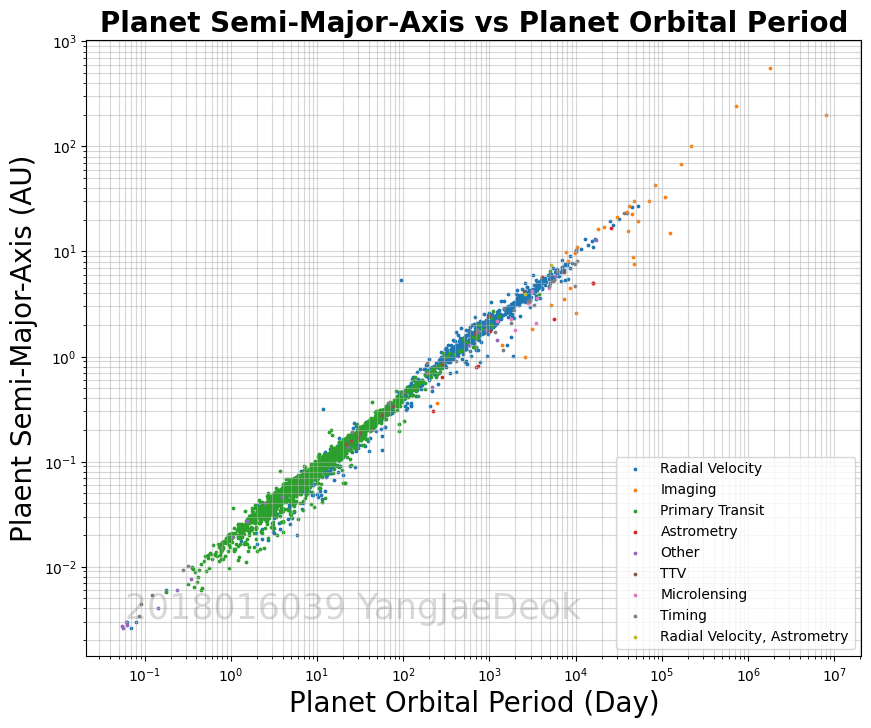

In [10]:
plot.figure(2,figsize=(10,8))

plot.title('Planet Semi-Major-Axis vs Planet Orbital Period',fontsize = 20 ,fontweight='bold')

# 발견 방법 별 산점도 플로팅
for index,type_name in enumerate(detection_type):
    plot.scatter(df_confirmed['orbital_period'][df_confirmed['detection_type']==type_name],
                 df_confirmed['semi_major_axis'][df_confirmed['detection_type']==type_name],
                 s=3)

plot.xscale('log')
plot.yscale('log')

plot.xlabel('Planet Orbital Period (Day)',fontsize = 20)
plot.ylabel('Plaent Semi-Major-Axis (AU)',fontsize = 20)

plot.grid(True, which="both", ls="-",alpha = 0.5)
plot.legend(detection_type,loc=4,fontsize=10, frameon=True)

plot.text(0.05, 0.05, '2018016039 YangJaeDeok', color='gray',
          fontsize=25, ha='left', va='bottom', alpha=0.3,
          transform=plot.gca().transAxes)

plot.show()

## B. 위 목록에서 모성으로부터 행성표면 단위면적(1m^2)당 도달하는 에너지를 계산하여 지구에 도달하는 에너지와 비슷한 행성들을 5개 찾아보시오.
(semi_major, star_teff, star_radius)

In [4]:
#필요한 상수 
o = 5.673e-8 #W/m^2
Sol_rad = 0.004652 # AU
Sol_teff = 6000 # K

# 태양상수 계산과 허용비율
S = (Sol_rad**2)*o*(Sol_teff**4)
percent = 10

# 태양상수, 허용치(허용비율) 출력
print('Solar Constant :',round(S),u"\u00B1",round(S * 0.01 * percent),f'W/m^2 ({percent}%)')

df['flux_ratio'] = ((df['star_radius'] / df['semi_major_axis'])**2) * (df['star_teff'] / Sol_teff)**4

# 범위에 해당하는 데이터 프레임 저장
df_filterd = df[(df['flux_ratio'] > (1-0.01*percent)) & (df['flux_ratio'] < (1+0.01*percent))]

# 필요한 데이터만 가져와서 새로 저장
EarthLikePlanet = df_filterd[['name','semi_major_axis','star_teff','star_radius','flux_ratio']]
# flux ratio 내림차순 정렬
EarthLikePlanet.sort_values('flux_ratio',ascending=False).head()

Solar Constant : 1591 ± 159 W/m^2 (10%)


,name,semi_major_axis,star_teff,star_radius,flux_ratio
3734,K06103.01,1.1712,6109.0,1.179,1.089033
7575,Ross 508 b,0.0530,3071.0,0.211,1.087746
1290,HD 216520 c,0.5280,5103.0,0.760,1.084068
3479,K05380.01,1.0371,6158.0,1.024,1.081714
3358,K05021.01,0.8775,5825.0,0.965,1.074333


## C. 0.1 태양질량 ~ 1.5 태양질량 범위를 가지는 항성의 Habitable zone을 그리고 태양계와 Gliese 581, 그리고 TRAPPIST-1 시스템을 표시하시오.
(가로flux on planet 범위는 각자 알아서 설정)

<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:78: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:78: SyntaxWarning: invalid escape sequence '\o'
/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_65177/2298760134.py:39: SyntaxWarning: invalid escape sequence '\o'
  plot.title('Habitable Zone of Star, (0.1~1.5M$_\odot$)',fontsize = 20 ,fontweight='bold')
/var/folders/pd/04lxxfb1181c74919b6p7jgw0000gn/T/ipykernel_65177/2298760134.py:78: SyntaxWarning: invalid escape sequence '\o'
  plot.ylabel('Mass of Star (M$_\odot$)',fontsize = 20)


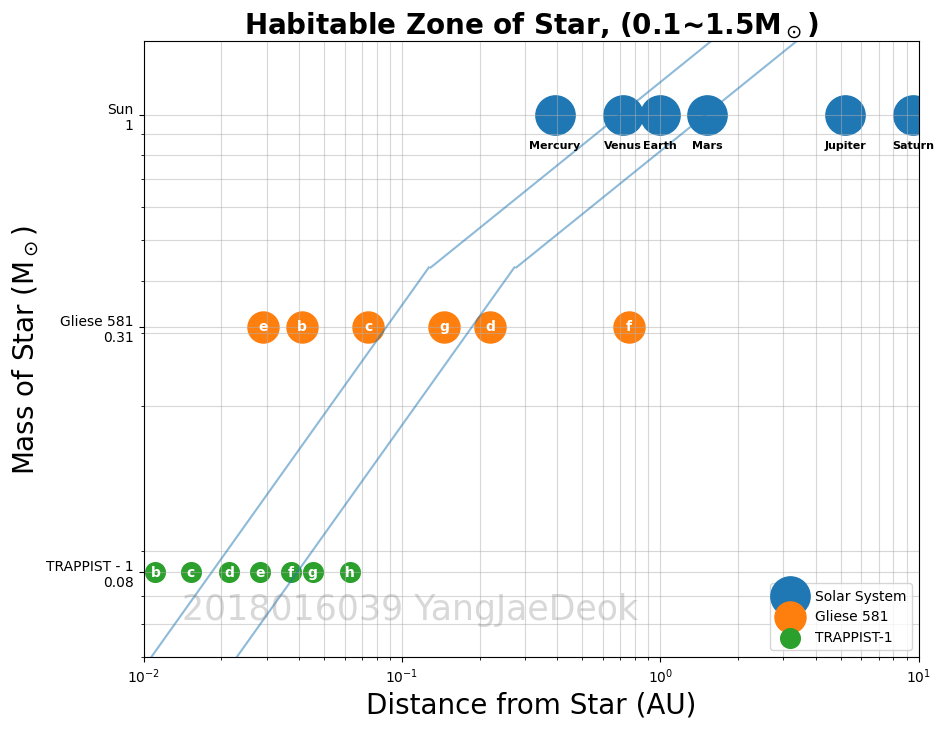

In [12]:
# Solar System
ss= [['Mercury',0.39,'Sun',1],
     ['Venus',0.72,'Sun',1],
     ['Earth',1,'Sun',1],
     ['Mars',1.52,'Sun',1],
     ['Jupiter',5.2,'Sun',1],
     ['Saturn',9.5,'Sun',1],
     ['Uranus',19.2,'Sun',1],
     ['Neptune',30.1,'Sun',1]]

SolarSystem = pd.DataFrame(data = ss,columns= ['name','semi_major_axis','star_name','star_mass'])

# Gliese 581 System
Gliese581system = df[(df['star_name']=='GJ 581')]

# TRAPPIST - 1 System
TRAPPIST1system = df[(df['star_name'])=='TRAPPIST-1']

# Flux on Planet 범위
R_min = 0.7 #AU
R_max = 1.5 #AU

# Star Mass 리스트 생성
a_1_mass = pd.DataFrame({'star_mass' : np.linspace(0.01,0.43,3000)})
a_2_mass = pd.DataFrame({'star_mass' : np.linspace(0.43,1.5,3000)})

a_1 = pd.DataFrame({'star_mass' : np.linspace(0.01,0.43,3000),
                    'a_min' : (0.23*(R_min**2)*(a_1_mass['star_mass']**2.3))**0.5,
                    'a_max' : (0.23*(R_max**2)*(a_1_mass['star_mass']**2.3))**0.5
                    })

a_2 = pd.DataFrame({'star_mass' : np.linspace(0.43,1.5,3000),
                    'a_min' : ((R_min**2)*a_2_mass['star_mass']**4)**0.5,
                    'a_max' : ((R_max**2)*a_2_mass['star_mass']**4)**0.5
                    })

plot.figure(3,figsize=(10,8))

plot.title('Habitable Zone of Star, (0.1~1.5M$_\odot$)',fontsize = 20 ,fontweight='bold')

# Plot Host Star Systems
# Solar System
plot.scatter(SolarSystem['semi_major_axis'],SolarSystem['star_mass'],s=800,label='Solar System')
# Planet Name
for i, name in enumerate(SolarSystem['name'][0:-2]):
    plot.text(SolarSystem.iloc[i]['semi_major_axis'],SolarSystem.iloc[i]['star_mass']-0.13,name,
              horizontalalignment='center',
              verticalalignment='top',
              fontsize = 8,
              fontweight = 'bold'
              )
# Gliese 581
plot.scatter(Gliese581system['semi_major_axis'],Gliese581system['star_mass'],s=500,label = 'Gliese 581')
# Planet Numer
for i, name in enumerate(Gliese581system['name']):
    plot.text(Gliese581system.iloc[i]['semi_major_axis'],Gliese581system.iloc[i]['star_mass'],name[-1],
              horizontalalignment='center',
              verticalalignment='center',
              color = 'white',
              fontweight = 'bold')
# TRAPPIST-1
plot.scatter(TRAPPIST1system['semi_major_axis'],TRAPPIST1system['star_mass'],s=200,label = 'TRAPPIST-1')
# Planet Number
for i, name in enumerate(TRAPPIST1system['name']):
    plot.text(TRAPPIST1system.iloc[i]['semi_major_axis'],TRAPPIST1system.iloc[i]['star_mass'],name[-1],
              horizontalalignment='center',
              verticalalignment='center',
              color = 'white',
              fontweight = 'bold')

# Habitable Zone Plot
plot.plot(a_1['a_max'],a_1['star_mass'],'C0',alpha = 0.5)
plot.plot(a_1['a_min'],a_1['star_mass'],'C0',alpha = 0.5)
plot.plot(a_2['a_max'],a_2['star_mass'],'C0',alpha = 0.5)
plot.plot(a_2['a_min'],a_2['star_mass'],'C0',alpha = 0.5)

plot.xlabel('Distance from Star (AU)',fontsize = 20)
plot.ylabel('Mass of Star (M$_\odot$)',fontsize = 20)

plot.xscale('log')
plot.yscale('log')

plot.xlim(0.01,10)
plot.ylim(0.05,1.5)

# y-axis value
s = SolarSystem['star_mass'].iloc[0]
g = Gliese581system['star_mass'].iloc[0]
t = TRAPPIST1system['star_mass'].iloc[0]
plot.yticks([s,g,t],[f'Sun\n{s}',f'Gliese 581\n{g}',f'TRAPPIST - 1\n{t}'])

plot.legend(loc=4,fontsize=10, frameon=True)
plot.grid(True, which="both", ls="-",alpha = 0.5)

plot.text(0.05, 0.05, '2018016039 YangJaeDeok', color='gray',
          fontsize=25, ha='left', va='bottom', alpha=0.3,
          transform=plot.gca().transAxes)

plot.show()